<h1 align='center'>Dimensionality Reduction</h1>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn

## PCA

In [2]:
# 3D dataset 
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_recovered=pca.inverse_transform(X_reduced)

In [10]:
X[:5]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

In [8]:
X_reduced[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [9]:
X_recovered[:5]

array([[-1.01450604, -0.54656333, -0.27441525],
       [-0.02103231,  0.55108376,  0.18101894],
       [-0.95379477, -0.4668077 , -0.24237013],
       [-0.91717404,  0.22083765, -0.01049779],
       [-0.74607229,  0.22027492,  0.00492637]])

### Explained Variance Ratio

In [11]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## Randomized PCA

In [16]:
rnd_pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X)

In [18]:
X_reduced[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

## Incremental PCA

In [13]:
from sklearn.decomposition import IncrementalPCA
inc_pca=IncrementalPCA(n_components=2,batch_size=10)

X_reduced=inc_pca.fit_transform(X)
X_recovered_inc_pca=inc_pca.inverse_transform(X_reduced)

In [14]:
X_reduced[:5]

array([[-1.26203291, -0.4206859 ],
       [ 0.08000792,  0.3528307 ],
       [-1.17545803, -0.36085194],
       [-0.8930544 ,  0.30860461],
       [-0.73015387,  0.25390193]])

In [15]:
X_recovered_inc_pca[:5]

array([[-1.01452276, -0.54664662, -0.27419246],
       [-0.02105462,  0.55125594,  0.18081586],
       [-0.95381412, -0.46686598, -0.24217957],
       [-0.91714216,  0.22089713, -0.01074718],
       [-0.74599845,  0.22021897,  0.00469089]])

## Kernel PCA

In [19]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [20]:
from sklearn.decomposition import KernelPCA

rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
X_reduced=rbf_pca.fit_transform(X)

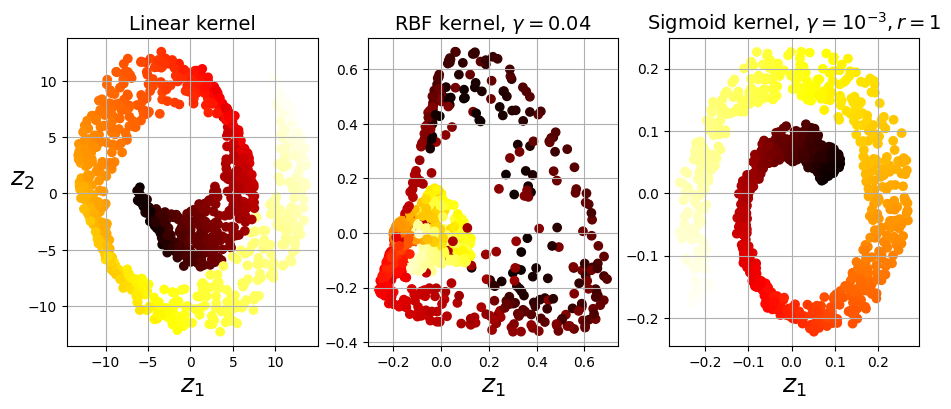

In [21]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

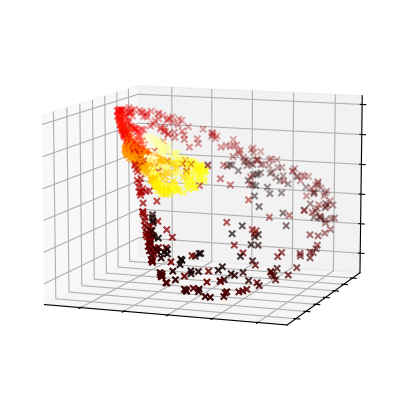

In [ ]:
#Reconstruct the data
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

### Selecting a Kernel and Tuning Hyperparameters

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [24]:

print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.043333333333333335), 'kpca__kernel': 'rbf'}


In [25]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576617

## LLE

In [27]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [28]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, eigen_solver="dense")
X_reduced = lle.fit_transform(X)

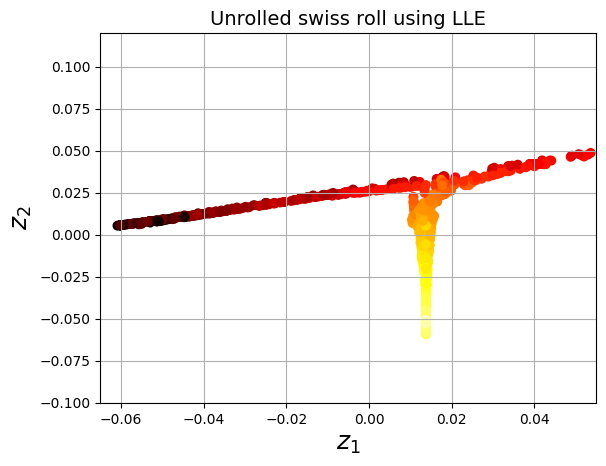

In [29]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

## Other Dimensionality Reduction Techniques

In [34]:
# Multidimensional scaling
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [35]:
#Isomap PCA+MDS
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
X_reduced_isomap = iso.fit_transform(X)

In [37]:
#t-Distributed Stochastic Neighbor Embedding
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [38]:
#Linear Discreminant Analysis
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist['data']
y_mnist = mnist['target'].astype(int)  # convert labels to integers

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)


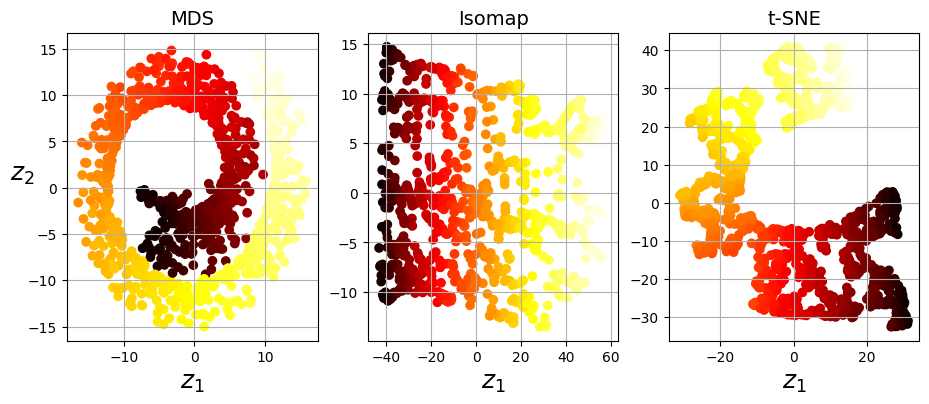

In [39]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()